In [107]:
#it's a library, so shhh!
shhh = function(...){
    suppressWarnings(
        suppressPackageStartupMessages(base::library(...))
    )
}

shhh(tidyverse)
shhh(psych)

In [123]:
#read in the data, skip the second row

readFile = readLines("./data/dat_cln.csv")
datRaw = read.csv(textConnection(readFile[-2]), header = T, sep = ",")

Warning message in readLines("./data/dat_cln.csv"):
“incomplete final line found on './data/dat_cln.csv'”

In [124]:
#func to recode 
unfactorise <- function(x) {
      case_when(x %in% c("Strongly disagree") ~ 1,
                x %in% c("Somewhat disagree") ~ 2,
                x %in% c("Neither agree nor disagree") ~ 3,
                x %in% c("Somewhat agree") ~ 4,
                x %in% c("Strongly agree") ~ 5)
}

In [127]:
datCln = data.frame(sapply(datRaw[, 1: 32], unfactorise))
head(datCln, 10)

SA1,HUM1,HUM2_R,SA2,SA3,LS1,HUM3_R,HUM4,HUM5,SA4,⋯,SA10,HUM11_R,LS4,SA11,HUM12,HUM13_R,HUM14_R,LS5,HUM15_R,HUM16_R
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,3,3,1,1,5,4,2,2,2,⋯,2,3,4,2,4,5,3,4,4,4
4,4,4,2,1,5,1,3,4,4,⋯,2,4,4,4,4,2,2,4,2,1
3,1,4,1,2,5,3,3,5,2,⋯,4,4,5,2,4,5,4,4,5,4
2,4,2,2,2,4,3,2,4,2,⋯,4,2,3,2,4,4,2,4,2,4
4,3,2,2,4,3,4,3,2,3,⋯,2,2,4,4,3,4,3,4,3,4
1,4,2,2,1,3,3,3,3,1,⋯,1,3,4,1,5,3,3,4,4,3
4,4,3,4,3,3,2,3,5,4,⋯,4,3,3,3,4,3,2,4,2,2
1,3,2,2,1,2,2,3,3,2,⋯,1,2,3,3,4,4,3,4,1,2
4,4,4,2,2,4,4,4,4,2,⋯,4,4,4,2,3,4,4,1,4,4


In [129]:
#recode reverse-coded items
datFnl = datCln %>% 
    mutate_at(vars(contains("_R")), list(~6 - .))
head(datFnl, 10)

SA1,HUM1,HUM2_R,SA2,SA3,LS1,HUM3_R,HUM4,HUM5,SA4,⋯,SA10,HUM11_R,LS4,SA11,HUM12,HUM13_R,HUM14_R,LS5,HUM15_R,HUM16_R
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,3,3,1,1,5,2,2,2,2,⋯,2,3,4,2,4,1,3,4,2,2
4,4,2,2,1,5,5,3,4,4,⋯,2,2,4,4,4,4,4,4,4,5
3,1,2,1,2,5,3,3,5,2,⋯,4,2,5,2,4,1,2,4,1,2
2,4,4,2,2,4,3,2,4,2,⋯,4,4,3,2,4,2,4,4,4,2
4,3,4,2,4,3,2,3,2,3,⋯,2,4,4,4,3,2,3,4,3,2
1,4,4,2,1,3,3,3,3,1,⋯,1,3,4,1,5,3,3,4,2,3
4,4,3,4,3,3,4,3,5,4,⋯,4,3,3,3,4,3,4,4,4,4
1,3,4,2,1,2,4,3,3,2,⋯,1,4,3,3,4,2,3,4,5,4
4,4,2,2,2,4,2,4,4,2,⋯,4,2,4,2,3,2,2,1,2,2


In [137]:
hum = datFnl %>% select(starts_with("HUM"))
sa = datFnl %>% select(starts_with("SA"))
ls = datFnl %>% select(starts_with("LS"))

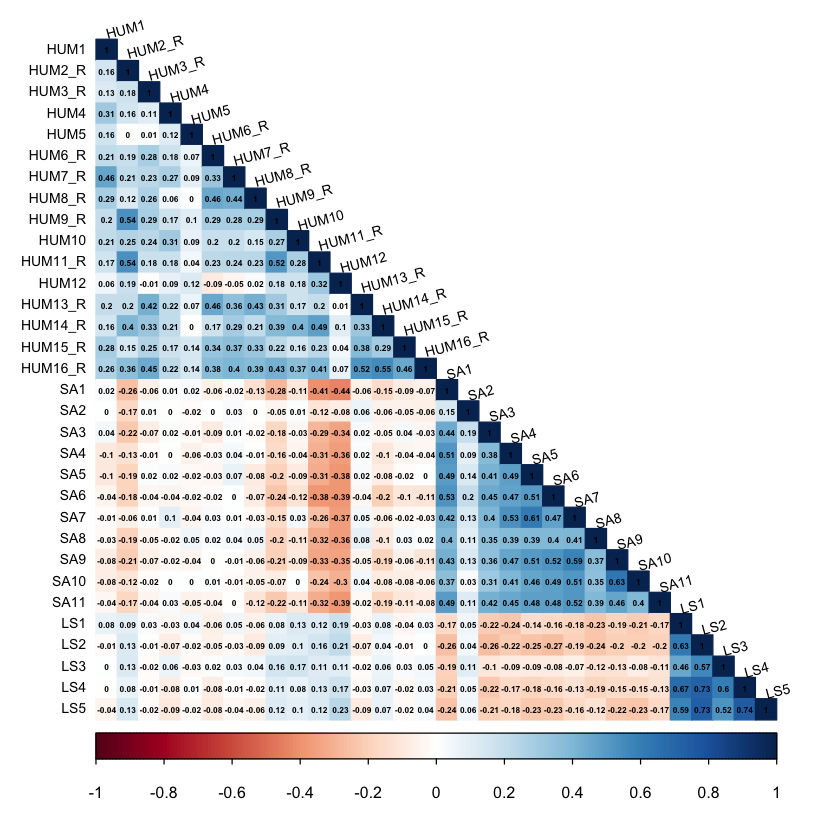

In [209]:
shhh(corrplot)

corr = cor(cbind(hum, sa, ls))

corr %>% 
    #corrplot only works with matrices!
    corrplot(method = "color", type = "lower", tl.col = "black", tl.srt = 15, diag = T, 
             tl.cex = .7, addCoef.col = "black", number.cex = .42, cl.cex = .8)

Parallel analysis suggests that the number of factors =  4  and the number of components =  NA 


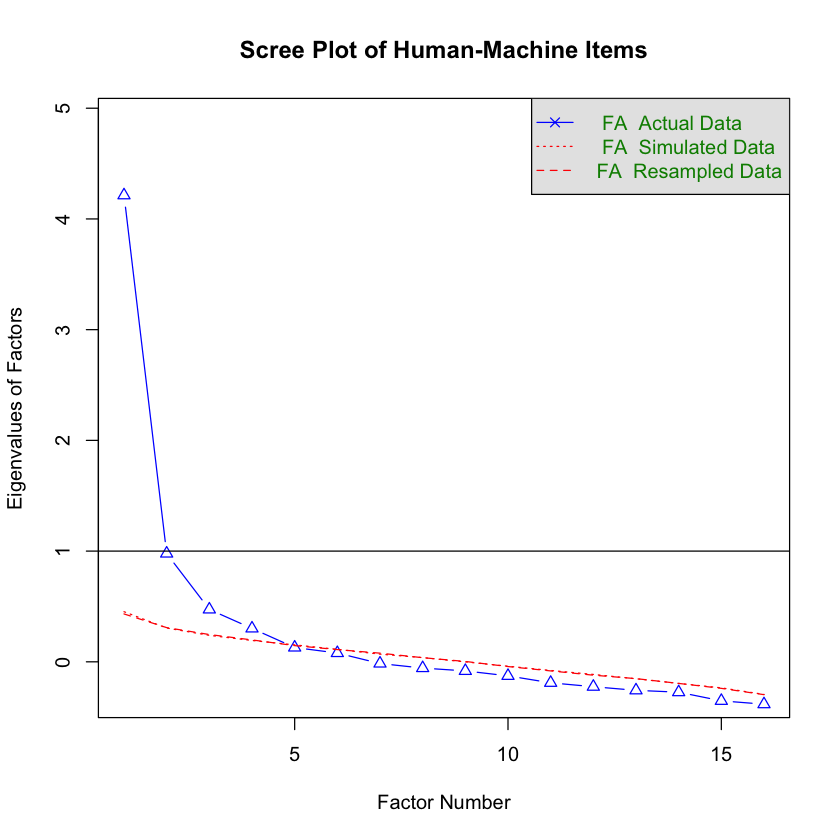

In [169]:
fa.parallel(hum, fm = "pa", fa = "fa", main = "Scree Plot of Human-Machine Items", 
            ylabel = "Eigenvalues of Factors")

In [170]:
#function to run multiple efa models
efa_mods_fun = function(x, n_models = NULL, ...){
    
    if (!is.data.frame(x))
        stop("x must be a dataframe with numeric values")
    
    efa_models = list()
    
    for (i in seq(n_models)){
        efa_models[[i]] = fa(x, nfactors = i, rotate = "oblimin", fm = "pa", 
                             use = "pairwise")
    }
    return(efa_models)
}

In [210]:
#check factor loadings for 1-factor solution
mods = efa_mods_fun(hum, n_models = 3)

mods[[1]]$loadings %>%
    print(sort = F, cutoff = .4)


Loadings:
        PA1  
HUM1    0.418
HUM2_R  0.503
HUM3_R  0.483
HUM4         
HUM5         
HUM6_R  0.521
HUM7_R  0.568
HUM8_R  0.522
HUM9_R  0.610
HUM10   0.453
HUM11_R 0.571
HUM12        
HUM13_R 0.606
HUM14_R 0.613
HUM15_R 0.524
HUM16_R 0.775

                 PA1
SS loadings    4.214
Proportion Var 0.263


According to the EFA, a one-factor model was sufficient. After reviewing the output, items with factor loadings below .40 were removed from further analyses. Furthermore, the model suggests that the items account for **only** 40% of the total variance...that's really low. 

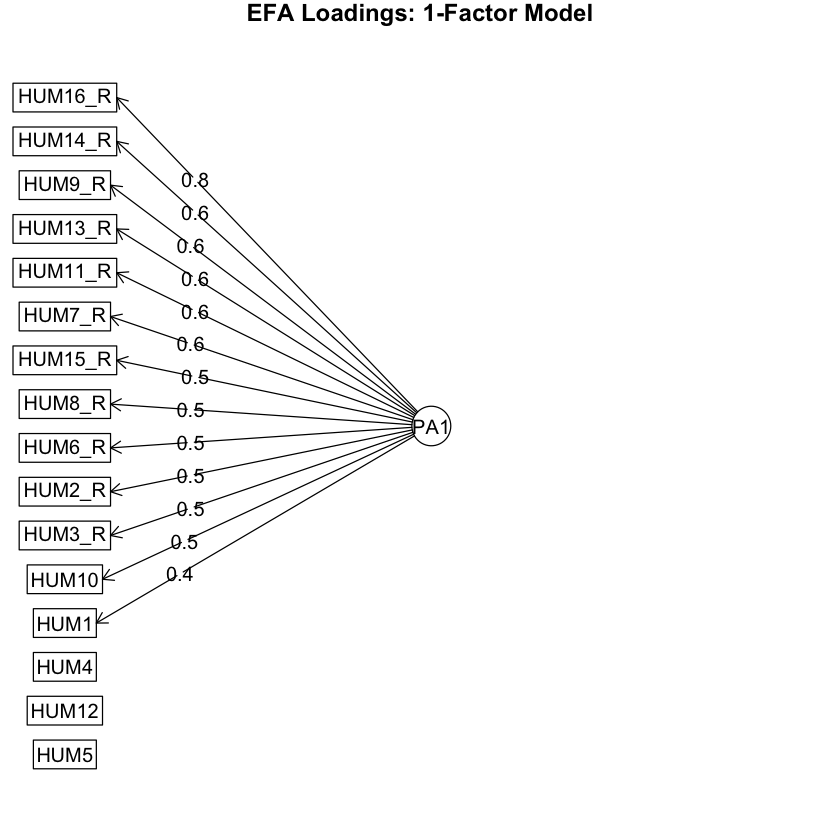

In [336]:
#quick viz of the factor loadings
fa.diagram(mods[[1]], cut = .4, main = "EFA Loadings: 1-Factor Model", sort = T)

In [288]:
humNew = hum[, -c(4, 5, 12)]

Using Item as id variables


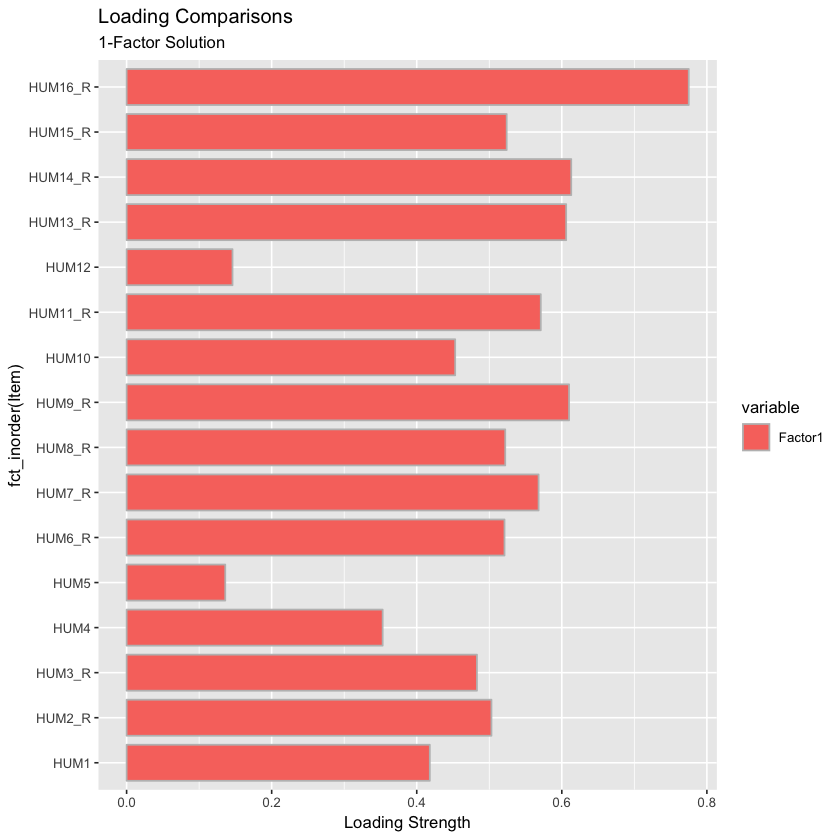

In [338]:
shhh(reshape2)

loadings = as.data.frame(mods[[1]]$loadings[]) %>%
    round(3) %>%
    rename(Factor1 = 1) %>%
    add_column(.before = 1, Item = names(hum)) %>%
    mutate(Item = as.factor(Item))

#viz of factor loadings
ggplot(melt(loadings), aes(fct_inorder(Item), abs(value), fill = variable)) +
    geom_bar(stat = "identity", width = .8, color = "gray") +
    coord_flip() +
    labs(title = "Loading Comparisons", 
         subtitle = "1-Factor Solution", 
         y = "Loading Strength") +
    theme_gray(base_size = 10) +
    theme(legend.position = "right")

In [335]:
alphas = lapply(list(humNew, sa, ls), psych::alpha)

alphas[[1]]$total #human-machine alpha: .85
alphas[[2]]$total #science alpha: .88
alphas[[3]]$total #satisfaction alpha: .89

raw_alpha,std.alpha,G6(smc),average_r,S/N,ase,mean,sd,median_r
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.8459842,0.8496668,0.8638917,0.3030197,5.65189,0.01162532,2.872602,0.6172789,0.285408


raw_alpha,std.alpha,G6(smc),average_r,S/N,ase,mean,sd,median_r
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.8804066,0.8769725,0.8796073,0.3932127,7.128263,0.008778455,2.063708,0.7694115,0.4211598


raw_alpha,std.alpha,G6(smc),average_r,S/N,ase,mean,sd,median_r
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.8865368,0.8927911,0.8782937,0.6248382,8.327582,0.009367581,3.644094,0.9517563,0.6167741
